# Seconda esperienza: BJT emettitore comune senza capacità

## Import delle dipendenze

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.ticker as mticker

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

## Valori dei componenti utilizzati

In [3]:
V_CC = 12.000
# Resistori (Ohm)
R_1 = 46620 #4cifre
R_2 = 6730
R_C = 3882
R_E = 470.3
R_S = 50
R_L = 1
# Condensatori (Farad)
C_i = 221.1e-9
C_o = 440.5e-9
# Valori misurati per polarizzazione
V_C = 0.8154
V_B = 1.4503
V_E = 5.234
V_CE = 4.440
V_BE = 0.6348
# misura di h_FE
h_FE = 204

## Dati raccolti

In [4]:
# Frequenze suggerite:
pts = 20
hint_nu = np.logspace(1,7, pts, base=10)
print(hint_nu)

[1.00000000e+01 2.06913808e+01 4.28133240e+01 8.85866790e+01
 1.83298071e+02 3.79269019e+02 7.84759970e+02 1.62377674e+03
 3.35981829e+03 6.95192796e+03 1.43844989e+04 2.97635144e+04
 6.15848211e+04 1.27427499e+05 2.63665090e+05 5.45559478e+05
 1.12883789e+06 2.33572147e+06 4.83293024e+06 1.00000000e+07]


In [5]:
nu = np.array([10.22,19.85,42.65,88.3,105.7,129.9,183.7,378,784,1623,3325,6920,14050,29138,61650,127050,258300,349000,545500,1033500,2608000,4805000,10810000])
V_in = np.array([810,820,820,820,820,820,810,810,810,810,810,810,810,810,800,800,800,810,800,800,800,790,740])*10**-3
V_out = np.array([0.56,1.05,2.05,3.64,4.10,4.55,5.23,5.99,6.27,6.35,6.35,6.35,6.31,6.20,6.07,5.71,4.70,4.02,3.02,1.81,0.8,0.44,0.24])

In [6]:
len(V_out)

23

### Calcolo della finzione di trasferimento e della capacità di $C_1$ per avere $\nu_C = 100 Hz$

In [7]:
nu_c = 100 #Frequenza di taglio desiderata
T = V_out/V_in
C_1 = 1/(2*np.pi*(R_2+R_S)*nu_c)

nu_c_attesa = 1/(2*np.pi*(R_2+R_S)*C_i)
print(nu_c_attesa)

106.16997013584222


### Creazione di un DataFrame contenente i dati raccolti e i dati elaborati

In [8]:
table = {"nu (Hz)": nu, "V_in (V)": V_in, "V_out (V)": V_out, "T":T}
df = pd.DataFrame(table)

In [9]:
df

,nu (Hz),V_in (V),V_out (V),T
0,10.22,0.81,0.56,0.691358
1,19.85,0.82,1.05,1.280488
2,42.65,0.82,2.05,2.500000
3,88.30,0.82,3.64,4.439024
4,105.70,0.82,4.10,5.000000
5,129.90,0.82,4.55,5.548780
6,183.70,0.81,5.23,6.456790
7,378.00,0.81,5.99,7.395062
8,784.00,0.81,6.27,7.740741
9,1623.00,0.81,6.35,7.839506


#### Conversione del DataFrame creato in formato LaTeX

In [10]:
df.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &      nu (Hz) &  V\\_in (V) &  V\\_out (V) &         T \\\\\n\\midrule\n0  &        10.22 &      0.81 &       0.56 &  0.691358 \\\\\n1  &        19.85 &      0.82 &       1.05 &  1.280488 \\\\\n2  &        42.65 &      0.82 &       2.05 &  2.500000 \\\\\n3  &        88.30 &      0.82 &       3.64 &  4.439024 \\\\\n4  &       105.70 &      0.82 &       4.10 &  5.000000 \\\\\n5  &       129.90 &      0.82 &       4.55 &  5.548780 \\\\\n6  &       183.70 &      0.81 &       5.23 &  6.456790 \\\\\n7  &       378.00 &      0.81 &       5.99 &  7.395062 \\\\\n8  &       784.00 &      0.81 &       6.27 &  7.740741 \\\\\n9  &      1623.00 &      0.81 &       6.35 &  7.839506 \\\\\n10 &      3325.00 &      0.81 &       6.35 &  7.839506 \\\\\n11 &      6920.00 &      0.81 &       6.35 &  7.839506 \\\\\n12 &     14050.00 &      0.81 &       6.31 &  7.790123 \\\\\n13 &     29138.00 &      0.81 &       6.20 &  7.654321 \\\\\n14 &     61650.00 &      0.80 &  

## Diagrammi di Bode

In [50]:
# definisco una funzione di linearità
def func(x, m, c):
    return m*x+c

### Funzione di trasferimento

$y=m*x+c$ $\implies$ $\nu_C=\frac{A_v}{m}-c$

100.06810227023615 395855.3364757657


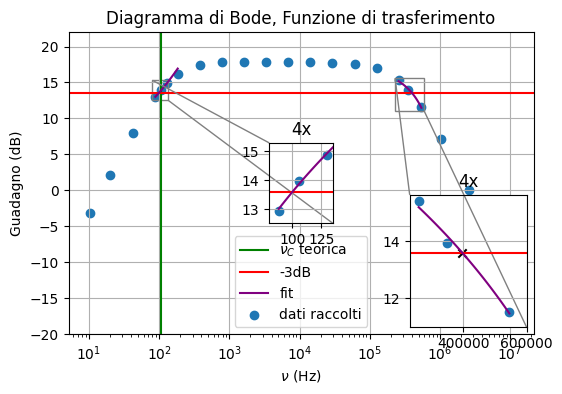

In [138]:
fig = plt.figure()
ay = fig.add_subplot(1, 1, 1)
ay.set_xscale('log')

plt.xscale("log")
plt.scatter(nu,20*np.log10(T), label="dati raccolti")
#plt.axhline(-3, color="red", label="-3dB") # Bisogna vedere se T_max == 1, altrimenti credo che questa ordinata non sia corretta
plt.axvline(nu_c_attesa, label="$\\nu_C$ teorica", color="green")
#plt.axhline(20*np.log10( T[8:14].mean()/np.sqrt(2)) )
plt.axhline(20*np.log10( T[8:14].mean()-3 ) ,color="red", label="-3dB")
#plt.scatter(355000,np.log())

plt.title("Diagramma di Bode, Funzione di trasferimento")

# faccio il fit lineare
sigma_T = T*np.sqrt(2)*0.03
# per la frequenza bassa
param_L,cov_L=curve_fit(func,nu[3:6],T[3:6],sigma=sigma_T[3:6])
m_L=param_L[0]
sigma_m_L=cov_L[0,0]
c_L=param_L[1]
sigma_c=cov_L[1,1]
x_fit_L=np.linspace(nu[3:7].min(),nu[3:7].max(),100)
y_fit_L=func(x_fit_L,m_L,c_L)
plt.plot(x_fit_L,20*np.log10(y_fit_L),color="purple",label="fit")
# per la frequenza alta
param_H,cov_H=curve_fit(func,nu[16:19],T[16:19],sigma=sigma_T[16:19])
m_H=param_H[0]
sigma_m_H=cov_H[0,0]
c_H=param_H[1]
sigma_H=cov_H[1,1]
x_fit_H=np.linspace(nu[16:19].min(),nu[16:19].max(),100)
y_fit_H=func(x_fit_H,m_H,c_H)
plt.plot(x_fit_H,20*np.log10(y_fit_H),color="purple")#,label="fit lineare")

nu_c_calcolata_L = (( T[8:14].mean()-3))/m_L - c_L/m_L
nu_c_calcolata_H = (( T[8:14].mean()-3))/m_H - c_H/m_H
print(nu_c_calcolata_L, nu_c_calcolata_H)

plt.xlabel("$\\nu$ (Hz)")
plt.ylabel("Guadagno (dB)")
plt.grid()
plt.ylim(-20,22)
plt.legend()

#per lo zoom sulla F_L

axins = zoomed_inset_axes(ay, 4,loc="center") 
axins.set_xlim(80, 135) 
axins.set_ylim(12.5,15.3) 
plt.scatter(nu,(20*np.log10(T)),marker='o')
#plt.plot(w,    H(w*2*np.pi), label="curva teorica")
plt.axhline(20*np.log10( T[8:14].mean()-3 ) ,color="red", label="-3dB")
plt.grid(which="both")
mark_inset(ay, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.xticks(visible=True)
plt.yticks(visible=True)

plt.plot(x_fit_L,20*np.log10(y_fit_L),color="purple")
plt.title("4x")

#per lo zoom sulla F_H

axins = zoomed_inset_axes(ay, 4,loc="lower right") 
axins.set_xlim(230000, 600000) 
axins.set_ylim(11,15.6) 
plt.scatter(nu,(20*np.log10(T)),marker='o')
#plt.plot(w,    H(w*2*np.pi), label="curva teorica")
plt.axhline(20*np.log10( T[8:14].mean()-3 ) ,color="red", label="-3dB")
plt.grid(which="both")
mark_inset(ay, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.xticks(visible=True)
plt.yticks(visible=True)


plt.plot(x_fit_H,20*np.log10(y_fit_H),color="purple")

plt.scatter(nu_c_calcolata_L,20*np.log10( T[8:14].mean()-3 ),marker="x",color="black")
plt.scatter(nu_c_calcolata_H,20*np.log10( T[8:14].mean()-3 ),marker="x",color="black")

plt.title("4x")



plt.savefig("Bode_T.png", dpi=300)

### Sfasamento

## Misura resistenza in uscita

$\frac{V_{out}^{(vuoto)}}{V_{out}^{(carico)}}=\frac{1}{R_L}(R_L+R_{out})=1+\frac{R_{out}}{R_L} \implies R_{out}=R_L(\frac{V_{out}^{(vuoto)}}{V_{out}^{(carico)}}-1)$

In [99]:
R_out_teorico = R_C
R_L = 3883

In [119]:
# Misure effettuate per 3 frequenze IN BANDA:
nu_rl = np.array([19850,40000,70000])
# Senza carico:
V_out_senza_carico = np.array([6.31,6.23,6.21])
# Con carico:
V_out_con_carico = np.array([3.26,3.22,3.22])

In [120]:
R_out = R_L*(V_out_senza_carico/V_out_con_carico -1)

In [121]:
R_out.mean()

3731.9158124706264

In [112]:
# Frequenza di taglio dovuta a C_out
1/(2*np.pi*R_C*(C_o))

93.07192314708143